<a href="https://colab.research.google.com/github/ChamaraProgForDataAnal/Programming-for-Data-Analysis/blob/main/Data_Analytics_%26_Visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loading Data**

In [25]:
import pandas as pd

# Load the uploaded dataset to inspect its structure
file_path = '/Dataset.xlsx'
data = pd.ExcelFile(file_path)

# Display the sheet names to understand the structure of the file
data.sheet_names

['ABBREV']

In [26]:
# Load the data from the 'ABBREV' sheet
dataset = data.parse('ABBREV')

# Display the first few rows of the dataset to understand its structure
dataset.head()


,NDB_No,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),...,Vit_K_(µg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct
0,1001,"BUTTER,WITH SALT",15.87,717,0.85,81.11,2.11,0.06,0.0,0.06,...,7.0,51.368,21.021,3.043,215.0,5.00,"1 pat, (1"" sq, 1/3"" high)",14.2,1 tbsp,0.0
1,1002,"BUTTER,WHIPPED,W/ SALT",16.72,718,0.49,78.30,1.62,2.87,0.0,0.06,...,4.6,45.390,19.874,3.331,225.0,3.80,"1 pat, (1"" sq, 1/3"" high)",9.4,1 tbsp,0.0
2,1003,"BUTTER OIL,ANHYDROUS",0.24,876,0.28,99.48,0.00,0.00,0.0,0.00,...,8.6,61.924,28.732,3.694,256.0,12.80,1 tbsp,205.0,1 cup,0.0
3,1004,"CHEESE,BLUE",42.41,353,21.40,28.74,5.11,2.34,0.0,0.50,...,2.4,18.669,7.778,0.800,75.0,28.35,1 oz,17.0,1 cubic inch,0.0
4,1005,"CHEESE,BRICK",41.11,371,23.24,29.68,3.18,2.79,0.0,0.51,...,2.5,18.764,8.598,0.784,94.0,132.00,"1 cup, diced",113.0,"1 cup, shredded",0.0


# **Check for missing values in the dataset**

In [27]:
# Check for missing values in the dataset
missing_values = dataset.isnull().sum()

# Identify duplicate rows
duplicate_rows = dataset.duplicated().sum()

# Summarize missing values and duplicate rows
missing_summary = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Values': missing_values.values
})
missing_summary = missing_summary[missing_summary['Missing Values'] > 0]
duplicate_summary = {"Total Duplicate Rows": duplicate_rows}

missing_summary, duplicate_summary


(               Column  Missing Values
 2           Water_(g)               1
 6             Ash_(g)             325
 8        Fiber_TD_(g)             594
 9       Sugar_Tot_(g)            1832
 10       Calcium_(mg)             348
 11          Iron_(mg)             144
 12     Magnesium_(mg)             739
 13    Phosphorus_(mg)             579
 14     Potassium_(mg)             426
 15        Sodium_(mg)              83
 16          Zinc_(mg)             706
 17         Copper_mg)            1257
 18     Manganese_(mg)            2160
 19      Selenium_(µg)            1700
 20         Vit_C_(mg)             818
 21       Thiamin_(mg)             634
 22    Riboflavin_(mg)             616
 23        Niacin_(mg)             637
 24     Panto_Acid_mg)            2242
 25        Vit_B6_(mg)             905
 26    Folate_Tot_(µg)            1261
 27    Folic_Acid_(µg)            2039
 28   Food_Folate_(µg)            1768
 29    Folate_DFE_(µg)            2057
 30  Choline_Tot_ (mg)   

# **Drop columns with more than 60% missing values**

In [28]:
# Define a threshold for dropping columns with excessive missing values
threshold = 0.6  # Drop columns with more than 60% missing values

# Calculate the percentage of missing values for each column
missing_percentage = dataset.isnull().mean()

# Drop columns exceeding the threshold
columns_to_drop = missing_percentage[missing_percentage > threshold].index
dataset_cleaned = dataset.drop(columns=columns_to_drop)

# Impute remaining missing values in numerical columns with their median
numerical_columns = dataset_cleaned.select_dtypes(include=['float64', 'int64']).columns
dataset_cleaned[numerical_columns] = dataset_cleaned[numerical_columns].fillna(dataset_cleaned[numerical_columns].median())

# Impute categorical columns with the most frequent value
categorical_columns = dataset_cleaned.select_dtypes(include=['object']).columns
dataset_cleaned[categorical_columns] = dataset_cleaned[categorical_columns].fillna(dataset_cleaned[categorical_columns].mode().iloc[0])

# Display the cleaned dataset summary
dataset_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 53 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   NDB_No             8790 non-null   int64  
 1   Shrt_Desc          8790 non-null   object 
 2   Water_(g)          8790 non-null   float64
 3   Energ_Kcal         8790 non-null   int64  
 4   Protein_(g)        8790 non-null   float64
 5   Lipid_Tot_(g)      8790 non-null   float64
 6   Ash_(g)            8790 non-null   float64
 7   Carbohydrt_(g)     8790 non-null   float64
 8   Fiber_TD_(g)       8790 non-null   float64
 9   Sugar_Tot_(g)      8790 non-null   float64
 10  Calcium_(mg)       8790 non-null   float64
 11  Iron_(mg)          8790 non-null   float64
 12  Magnesium_(mg)     8790 non-null   float64
 13  Phosphorus_(mg)    8790 non-null   float64
 14  Potassium_(mg)     8790 non-null   float64
 15  Sodium_(mg)        8790 non-null   float64
 16  Zinc_(mg)          8790 

# **Descriptive statistics of numerical columns**

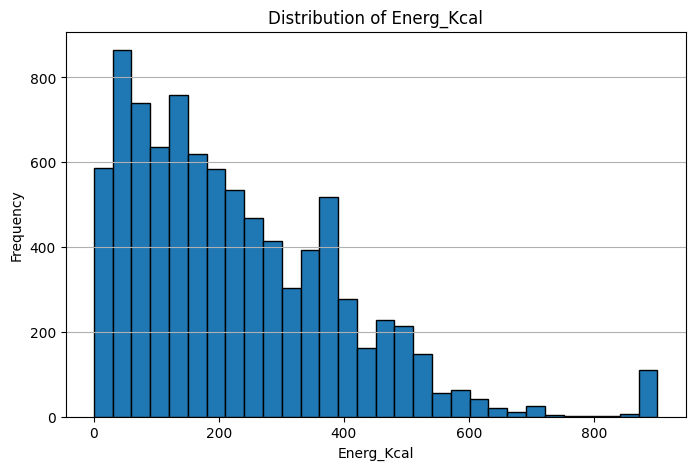

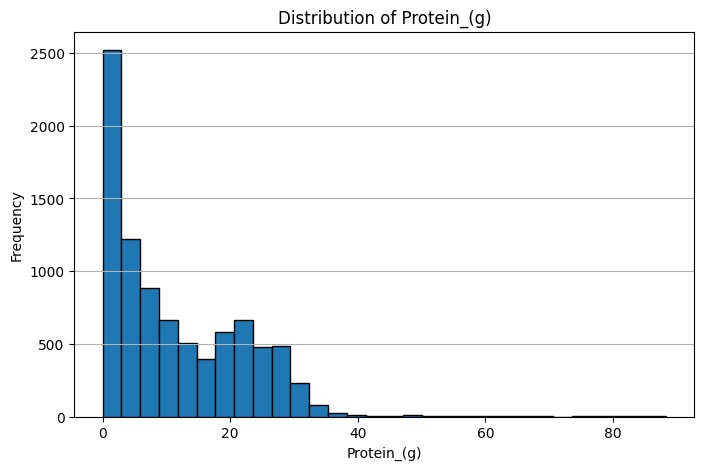

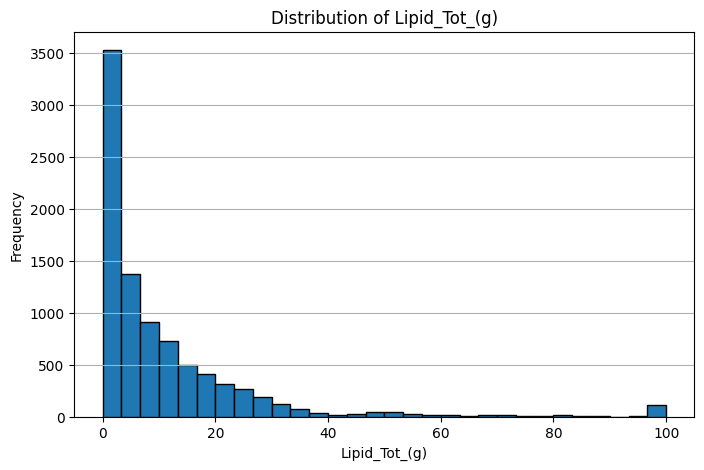

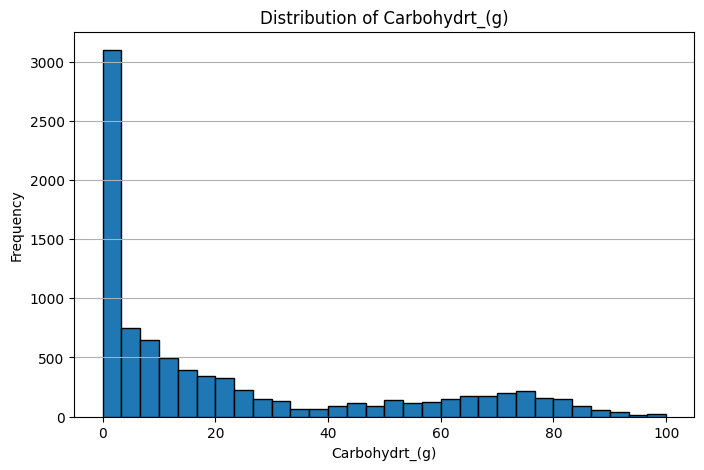

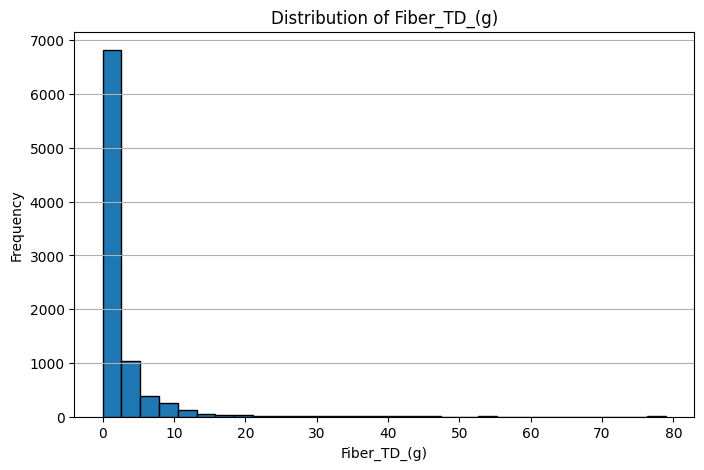

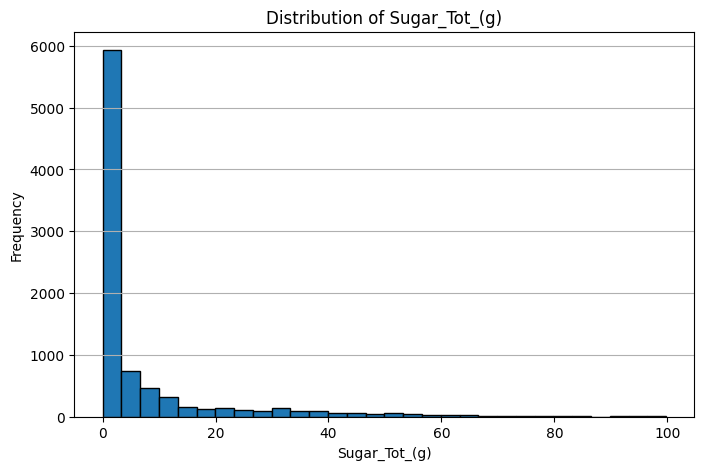

,count,mean,std,min,25%,50%,75%,max
NDB_No,8790.0,15663.495222,9251.413586,1001.0,9086.2500,14427.5000,20142.75000,93600.000
Water_(g),8790.0,54.113238,30.771252,0.0,29.7175,63.0800,77.96000,100.000
Energ_Kcal,8790.0,226.317634,169.877539,0.0,91.0000,191.0000,337.00000,902.000
Protein_(g),8790.0,11.342849,10.530474,0.0,2.3800,8.0000,19.88000,88.320
Lipid_Tot_(g),8790.0,10.553725,15.814842,0.0,0.9500,5.1400,13.72000,100.000
Ash_(g),8790.0,1.761895,2.950589,0.0,0.8700,1.2000,2.02000,99.800
Carbohydrt_(g),8790.0,22.127710,27.270822,0.0,0.0500,9.3400,34.91000,100.000
Fiber_TD_(g),8790.0,2.086928,4.248871,0.0,0.0000,0.7000,2.40000,79.000
Sugar_Tot_(g),8790.0,7.146022,13.553783,0.0,0.0900,1.8400,6.05750,99.800
Calcium_(mg),8790.0,74.531513,199.753366,0.0,10.0000,21.0000,64.00000,7364.000


In [29]:
import matplotlib.pyplot as plt

# Descriptive statistics of numerical columns
descriptive_stats = dataset_cleaned.describe()

# Plot histograms for key nutritional attributes
key_attributes = ['Energ_Kcal', 'Protein_(g)', 'Lipid_Tot_(g)', 'Carbohydrt_(g)', 'Fiber_TD_(g)', 'Sugar_Tot_(g)']

for attribute in key_attributes:
    plt.figure(figsize=(8, 5))
    plt.hist(dataset_cleaned[attribute], bins=30, edgecolor='black')
    plt.title(f'Distribution of {attribute}')
    plt.xlabel(attribute)
    plt.ylabel('Frequency')
    plt.grid(axis='y')
    plt.show()

# Display descriptive statistics to the user
descriptive_stats.T


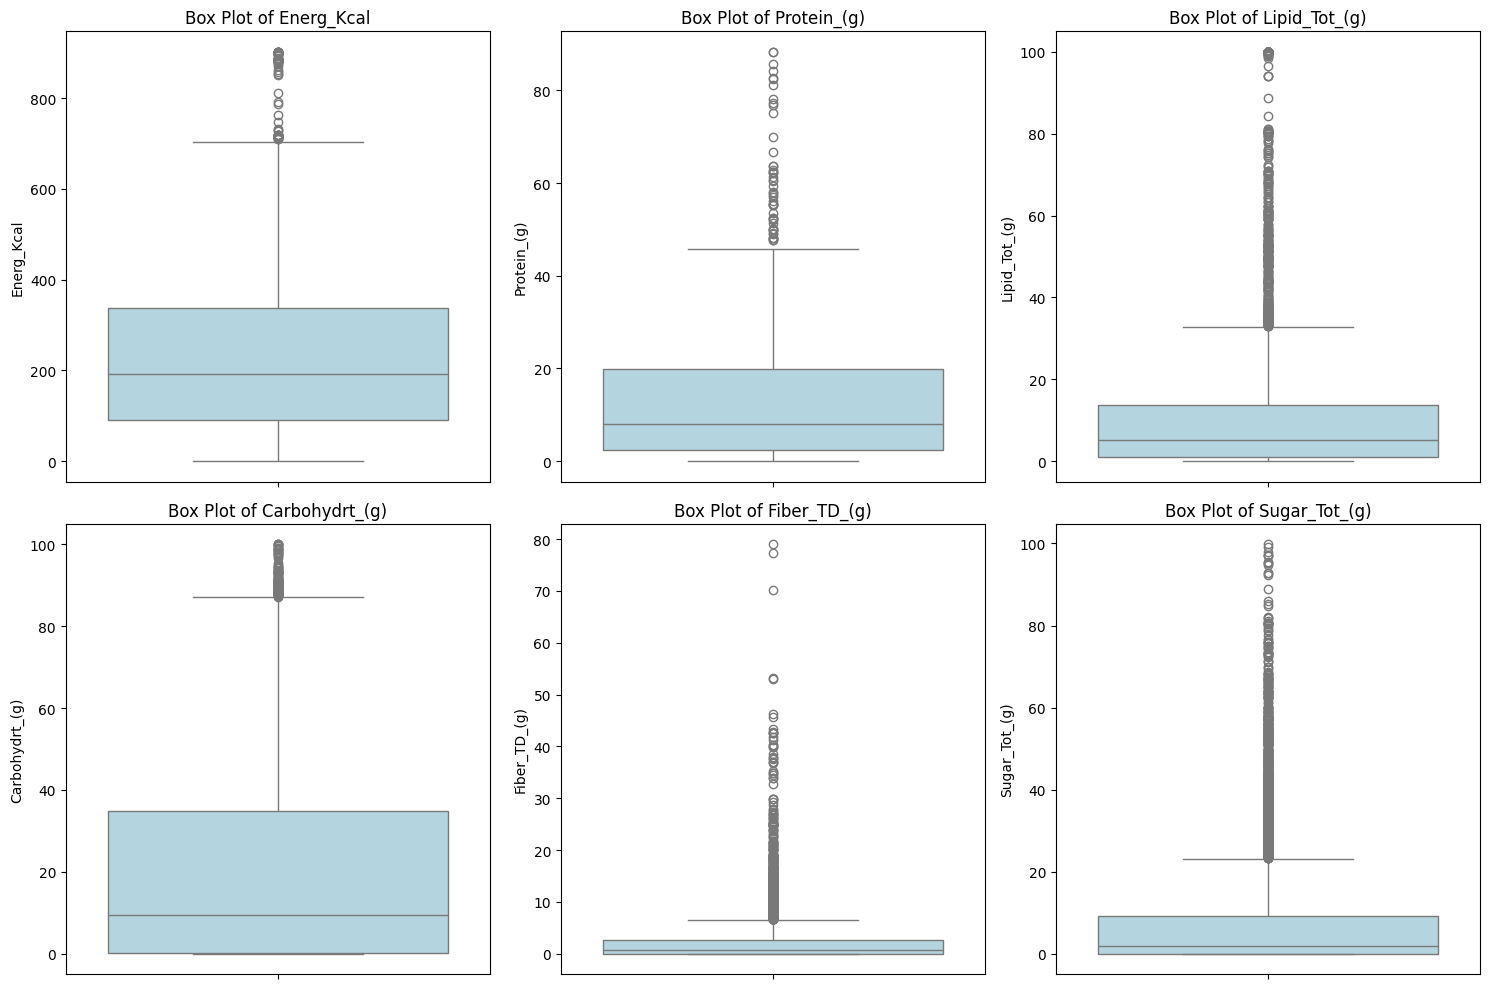

,count,mean,std,min,25%,50%,75%,max
Energ_Kcal,8790.0,226.317634,169.877539,0.0,91.00,191.00,337.0000,902.00
Protein_(g),8790.0,11.342849,10.530474,0.0,2.38,8.00,19.8800,88.32
Lipid_Tot_(g),8790.0,10.553725,15.814842,0.0,0.95,5.14,13.7200,100.00
Carbohydrt_(g),8790.0,22.127710,27.270822,0.0,0.05,9.34,34.9100,100.00
Fiber_TD_(g),8196.0,2.187445,4.383138,0.0,0.00,0.70,2.6000,79.00
Sugar_Tot_(g),6958.0,8.543066,14.923626,0.0,0.00,1.84,9.2875,99.80


In [30]:
# Select a few key numeric columns for detailed analysis
numeric_columns = ['Energ_Kcal', 'Protein_(g)', 'Lipid_Tot_(g)', 'Carbohydrt_(g)', 'Fiber_TD_(g)', 'Sugar_Tot_(g)']

# Summary statistics for the selected columns
numeric_summary = dataset[numeric_columns].describe()

# Box plots to visualize outliers in these columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=dataset[column], color='lightblue')
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

numeric_summary.T  # Display the summary statistics transposed for clarity


# **Detect outliers using the IQR method**

In [31]:
# Function to detect outliers using the IQR method
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Detect outliers in the key nutritional attributes
outlier_summary = {}
for attribute in key_attributes:
    outliers = detect_outliers(dataset_cleaned, attribute)
    outlier_summary[attribute] = {
        "Total Outliers": len(outliers),
        "Lower Bound": dataset_cleaned[attribute].quantile(0.25) - 1.5 * (dataset_cleaned[attribute].quantile(0.75) - dataset_cleaned[attribute].quantile(0.25)),
        "Upper Bound": dataset_cleaned[attribute].quantile(0.75) + 1.5 * (dataset_cleaned[attribute].quantile(0.75) - dataset_cleaned[attribute].quantile(0.25))
    }

# Convert the summary to a DataFrame for better readability
outlier_summary_df.T

,Energ_Kcal,Protein_(g),Lipid_Tot_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g)
Total Outliers,148.0,49.00,492.000,110.00,805.0,1237.00000
Lower Bound,-278.0,-23.87,-18.205,-52.24,-3.6,-8.86125
Upper Bound,706.0,46.13,32.875,87.20,6.0,15.00875


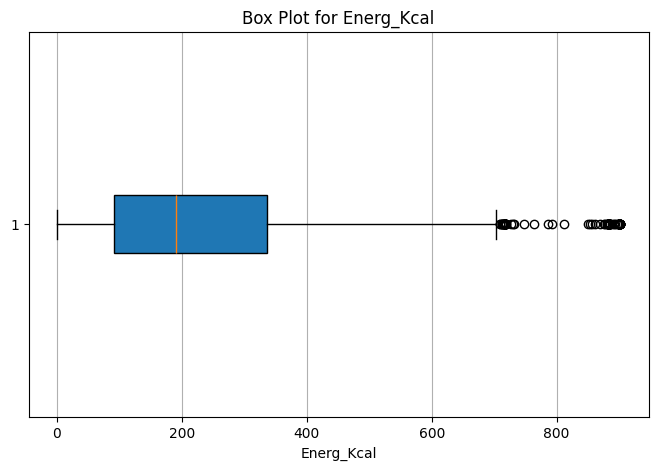

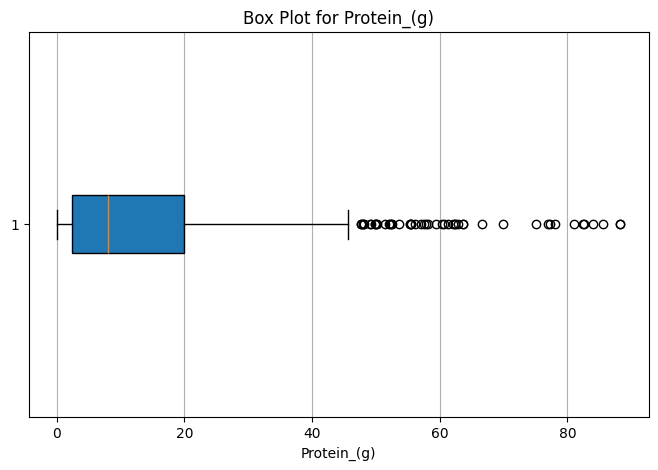

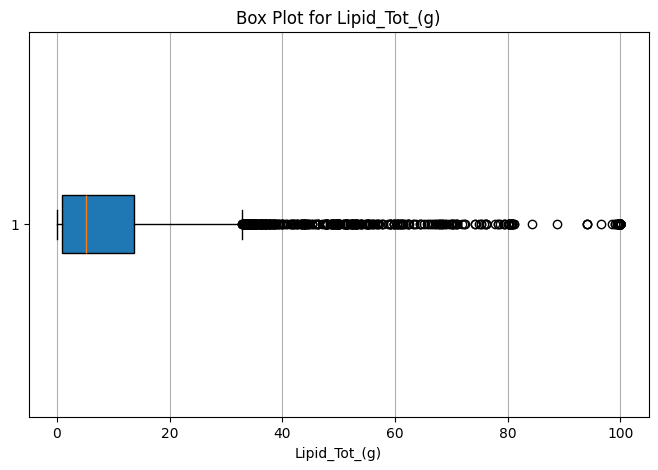

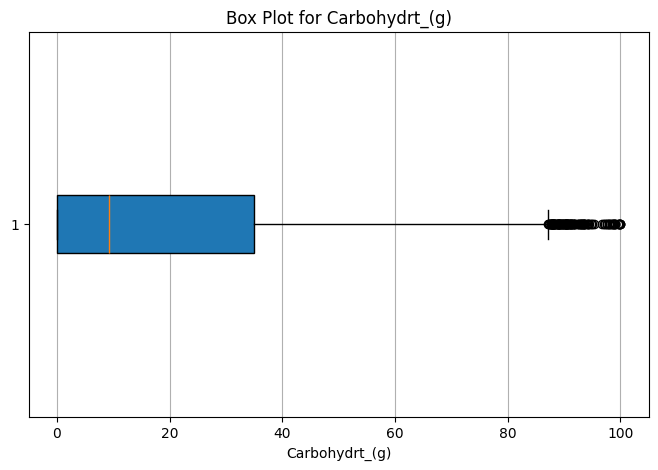

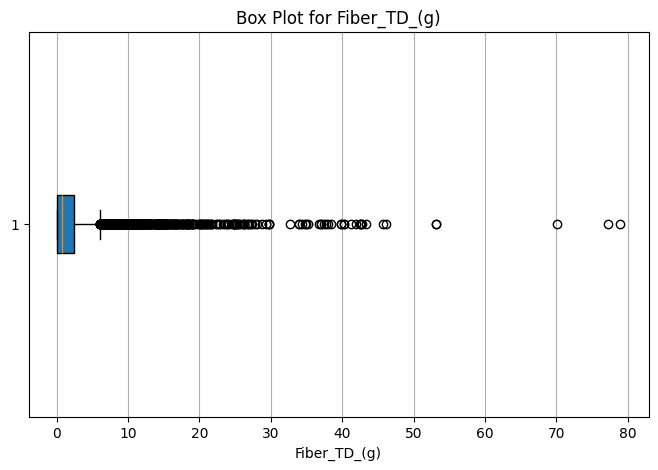

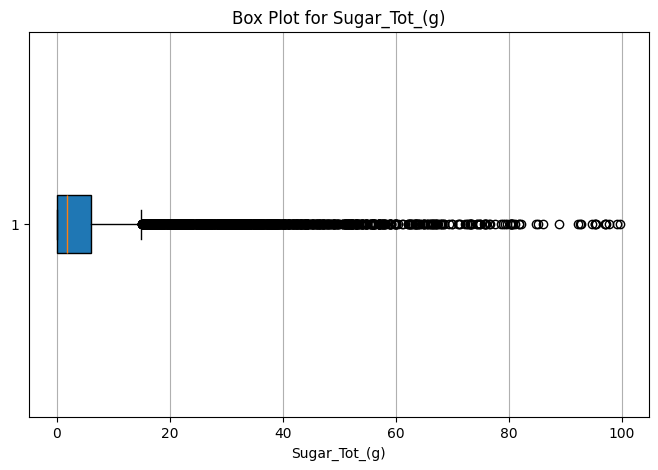

In [32]:
# Visualize outliers using box plots for the key nutritional attributes
for attribute in key_attributes:
    plt.figure(figsize=(8, 5))
    plt.boxplot(dataset_cleaned[attribute], vert=False, patch_artist=True)
    plt.title(f'Box Plot for {attribute}')
    plt.xlabel(attribute)
    plt.grid(axis='x')
    plt.show()


# **Cap outliers for all key attributes**

In [33]:
# Function to cap outliers within the IQR range
def cap_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = data[column].clip(lower=lower_bound, upper=upper_bound)

# Cap outliers for all key attributes
for attribute in key_attributes:
    cap_outliers(dataset, attribute)

# Confirm outliers have been handled by rechecking the summary statistics
updated_descriptive_stats = dataset[key_attributes].describe()
updated_descriptive_stats.T  # Display transposed for better readability

,count,mean,std,min,25%,50%,75%,max
Energ_Kcal,8790.0,223.880205,161.503200,0.0,91.00,191.00,337.0000,706.00000
Protein_(g),8790.0,11.256960,10.136367,0.0,2.38,8.00,19.8800,46.13000
Lipid_Tot_(g),8790.0,8.935028,9.748561,0.0,0.95,5.14,13.7200,32.87500
Carbohydrt_(g),8790.0,22.067691,27.118534,0.0,0.05,9.34,34.9100,87.20000
Fiber_TD_(g),8196.0,1.638494,2.119001,0.0,0.00,0.70,2.6000,6.50000
Sugar_Tot_(g),6958.0,6.086912,8.208236,0.0,0.00,1.84,9.2875,23.21875


# **Compute correlation matrix**

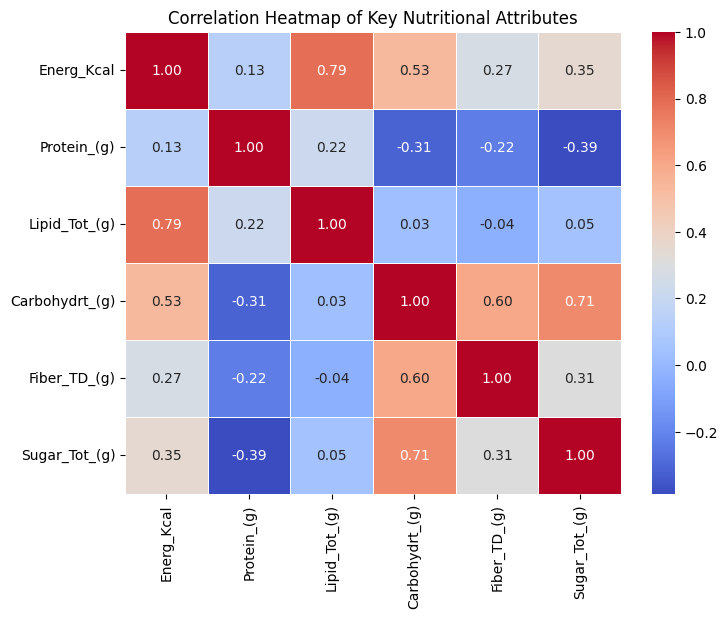

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix
correlation_matrix = dataset[key_attributes].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Key Nutritional Attributes")
plt.show()


# **Scatter plot matrix**

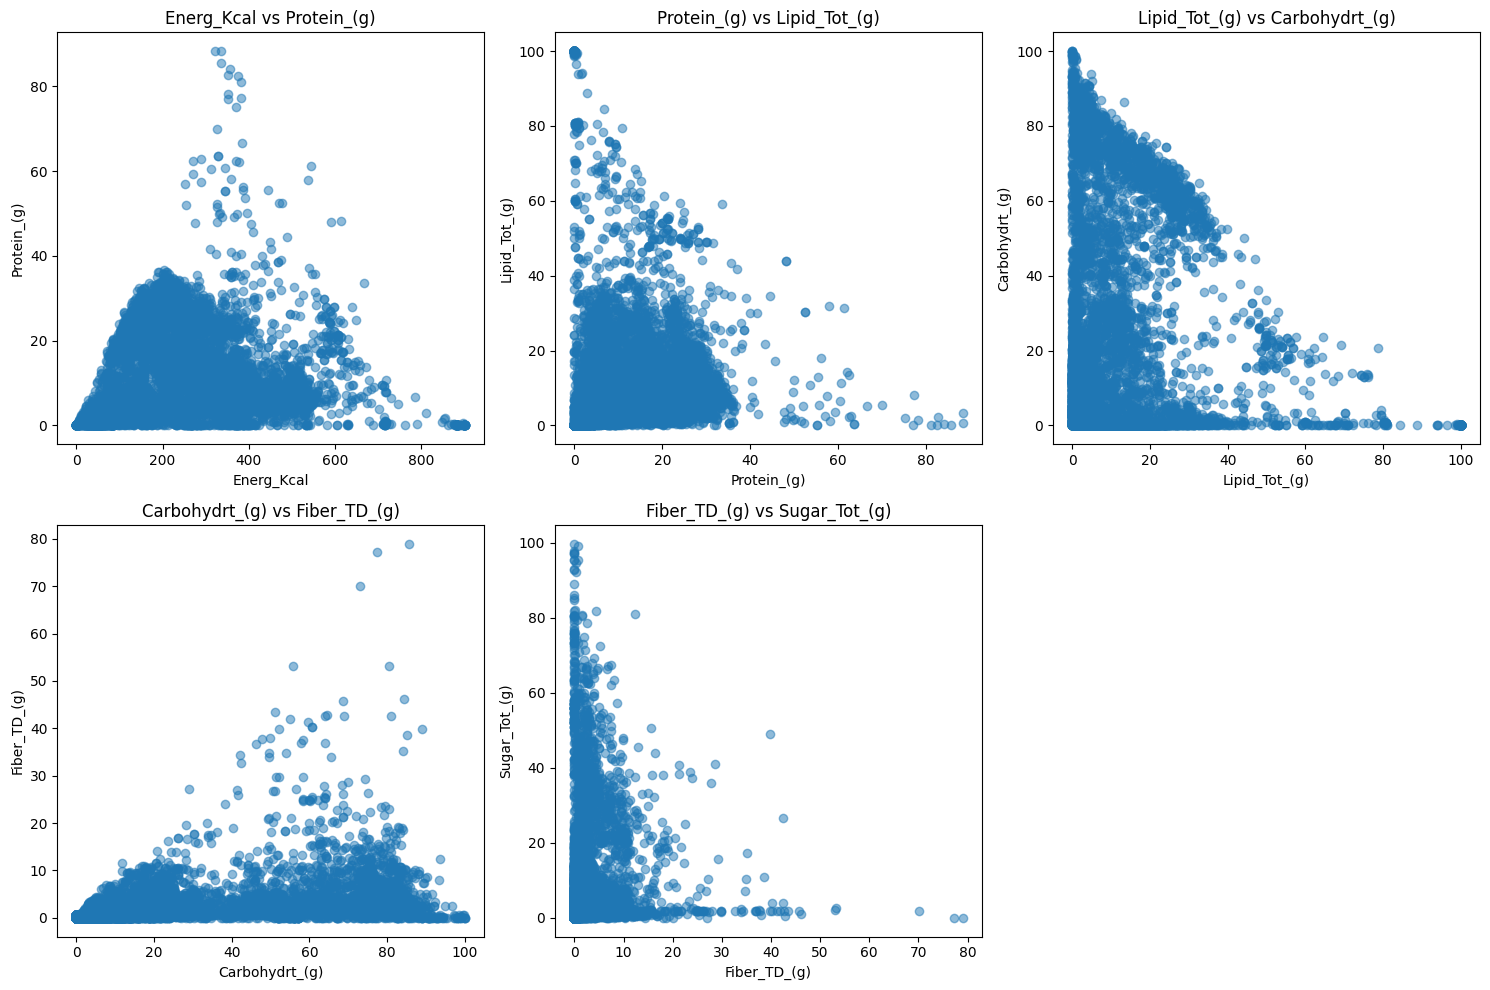

In [35]:
# Scatter plot matrix for selected attributes
plt.figure(figsize=(15, 10))

for i, (attr_x, attr_y) in enumerate(zip(key_attributes[:-1], key_attributes[1:]), start=1):
    plt.subplot(2, 3, i)
    plt.scatter(dataset_cleaned[attr_x], dataset_cleaned[attr_y], alpha=0.5)
    plt.title(f"{attr_x} vs {attr_y}")
    plt.xlabel(attr_x)
    plt.ylabel(attr_y)

plt.tight_layout()
plt.show()


# **Apply K-Means clustering**

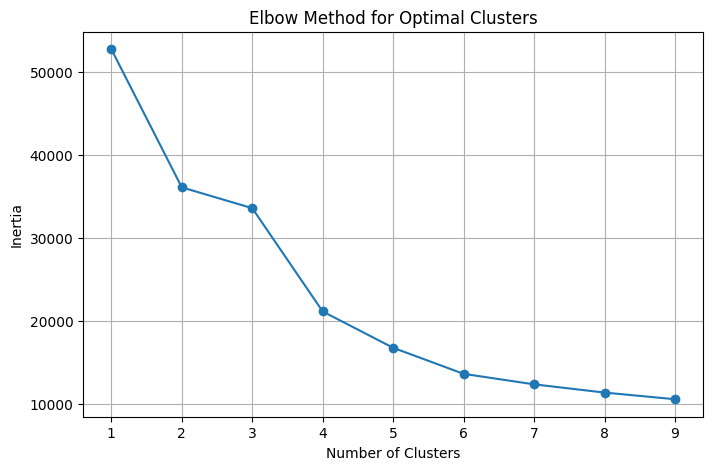

In [36]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

# Select the key attributes for clustering
clustering_data = dataset_cleaned[key_attributes]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

# Determine the optimal number of clusters using the elbow method
inertia = []
range_clusters = range(1, 10)
for n_clusters in range_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertia, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid()
plt.show()


In [37]:
# Based on the elbow method, choose the optimal number of clusters (e.g., 4)
optimal_clusters = 4

# Apply K-Means clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
dataset['Cluster'] = kmeans.fit_predict(scaled_data)

# Analyze the clustering results by calculating cluster-wise statistics
cluster_summary = dataset.groupby('Cluster')[key_attributes].mean()

# Display the cluster summary
cluster_summary.T


Cluster,0,1,2,3
Energ_Kcal,89.403119,210.515240,629.917847,395.367509
Protein_(g),3.100246,22.651991,8.002380,7.889490
Lipid_Tot_(g),2.398518,11.483755,32.875000,11.650057
Carbohydrt_(g),14.011530,2.951417,7.689235,67.084740
Fiber_TD_(g),1.678774,0.246390,1.968098,3.596497
Sugar_Tot_(g),5.262239,0.598117,1.879446,15.495832


In [39]:
# Define a threshold for high-calorie foods (e.g., top 10% of calories)
high_calorie_threshold = dataset['Energ_Kcal'].quantile(0.90)

# Filter high-calorie foods
high_calorie_foods = dataset[dataset['Energ_Kcal'] > high_calorie_threshold]

# Summary statistics for high-calorie foods
high_calorie_summary = high_calorie_foods.describe()

# Compare average nutritional profiles of high-calorie foods vs. the rest
low_calorie_foods = dataset[dataset['Energ_Kcal'] <= high_calorie_threshold]
comparison_summary = pd.DataFrame({
    "High-Calorie Foods": high_calorie_foods[numeric_columns].mean(),
    "Low-Calorie Foods": low_calorie_foods[numeric_columns].mean()
})

# Display the comparison
comparison_summary.T

,Energ_Kcal,Protein_(g),Lipid_Tot_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g)
High-Calorie Foods,553.126568,8.353854,28.366978,39.656864,2.515301,11.595758
Low-Calorie Foods,187.389738,11.578712,6.781380,20.118278,1.539696,5.434280


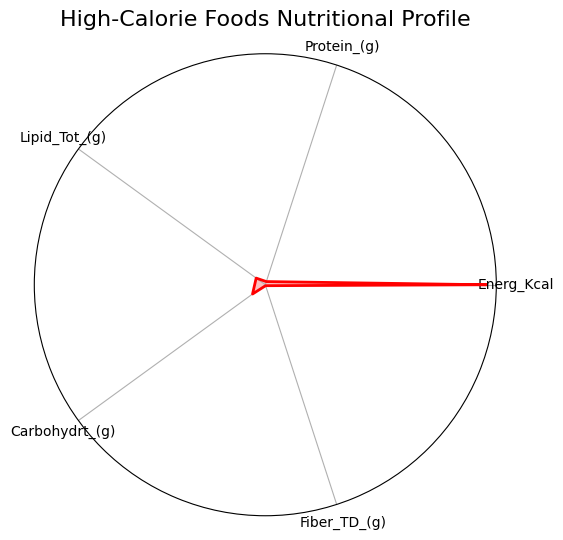

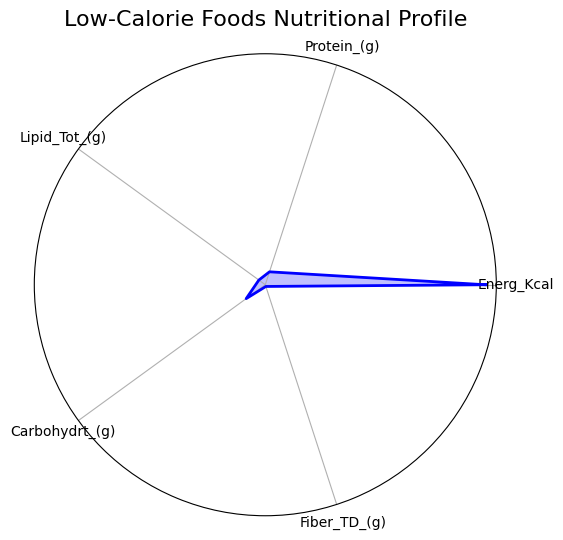

In [40]:
# Function to create a radar chart
def plot_radar_chart(categories, values, title, color):
    N = len(categories)
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    values += values[:1]  # Repeat the first value to close the chart
    angles += angles[:1]  # Close the polygon

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.fill(angles, values, color=color, alpha=0.25)
    ax.plot(angles, values, color=color, linewidth=2)
    ax.set_yticks([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    ax.set_title(title, size=16, pad=20)

# Data for radar charts
categories = numeric_columns[:5]  # Select top attributes for radar chart
high_calorie_values = comparison_summary.loc[categories, "High-Calorie Foods"].values.tolist()
low_calorie_values = comparison_summary.loc[categories, "Low-Calorie Foods"].values.tolist()

# Plot radar charts for high- and low-calorie foods
plot_radar_chart(categories, high_calorie_values, "High-Calorie Foods Nutritional Profile", "red")
plot_radar_chart(categories, low_calorie_values, "Low-Calorie Foods Nutritional Profile", "blue")

plt.show()

In [42]:
# Define thresholds for high-protein and high-carbohydrate foods (top 10%)
high_protein_threshold = dataset['Protein_(g)'].quantile(0.90)
high_carb_threshold = dataset['Carbohydrt_(g)'].quantile(0.90)

# Filter high-protein and high-carbohydrate foods
high_protein_foods = dataset[dataset['Protein_(g)'] > high_protein_threshold]
high_carb_foods = dataset[dataset['Carbohydrt_(g)'] > high_carb_threshold]

# Summary statistics for high-protein and high-carbohydrate foods
high_protein_summary = high_protein_foods.describe()
high_carb_summary = high_carb_foods.describe()

# Compare average nutritional profiles of high-protein and high-carbohydrate foods
comparison_high = pd.DataFrame({
    "High-Protein Foods": high_protein_foods[numeric_columns].mean(),
    "High-Carbohydrate Foods": high_carb_foods[numeric_columns].mean()
})

# Display the comparison
comparison_high.T

,Energ_Kcal,Protein_(g),Lipid_Tot_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g)
High-Protein Foods,233.862344,30.549340,10.026928,3.070421,0.348368,0.755589
High-Carbohydrate Foods,379.541524,6.653106,5.278237,79.081286,3.783254,15.894893


# **Correlation in High-Carbohydrate Foods**

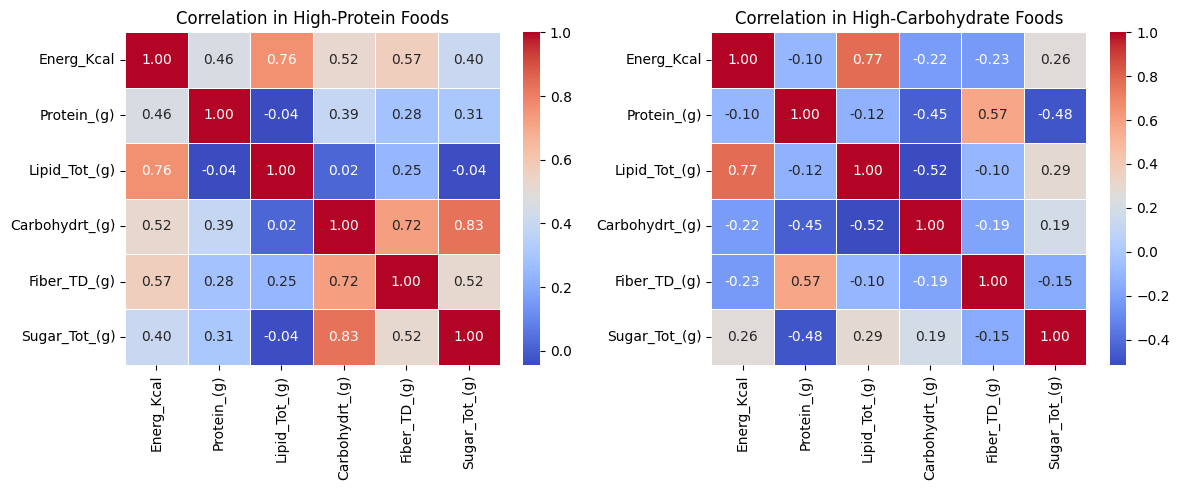

In [43]:
# Compute correlations for high-protein and high-carbohydrate foods
high_protein_corr = high_protein_foods[numeric_columns].corr()
high_carb_corr = high_carb_foods[numeric_columns].corr()

# Plot correlation heatmaps
plt.figure(figsize=(12, 5))

# High-Protein Foods Correlation
plt.subplot(1, 2, 1)
sns.heatmap(high_protein_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation in High-Protein Foods")

# High-Carbohydrate Foods Correlation
plt.subplot(1, 2, 2)
sns.heatmap(high_carb_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation in High-Carbohydrate Foods")

plt.tight_layout()
plt.show()

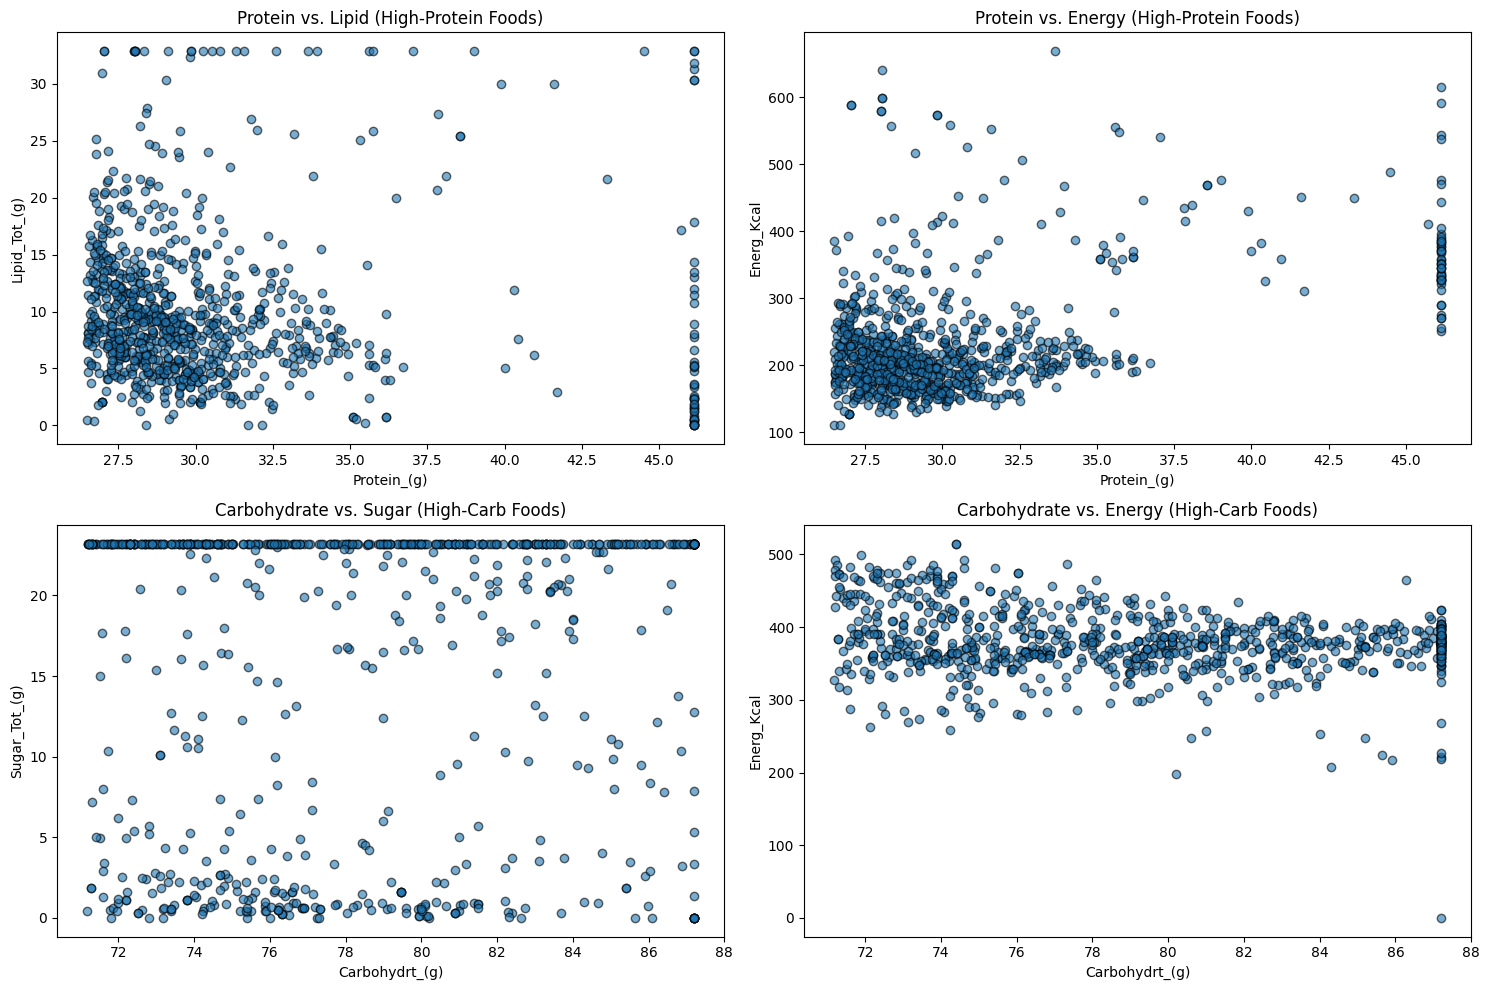

In [44]:
# Scatter plots for high-protein and high-carb groups
plt.figure(figsize=(15, 10))

# High-Protein Foods: Protein vs. Lipid and Protein vs. Energy
plt.subplot(2, 2, 1)
plt.scatter(high_protein_foods['Protein_(g)'], high_protein_foods['Lipid_Tot_(g)'], alpha=0.6, edgecolor='k')
plt.title("Protein vs. Lipid (High-Protein Foods)")
plt.xlabel("Protein_(g)")
plt.ylabel("Lipid_Tot_(g)")

plt.subplot(2, 2, 2)
plt.scatter(high_protein_foods['Protein_(g)'], high_protein_foods['Energ_Kcal'], alpha=0.6, edgecolor='k')
plt.title("Protein vs. Energy (High-Protein Foods)")
plt.xlabel("Protein_(g)")
plt.ylabel("Energ_Kcal")

# High-Carb Foods: Carbohydrate vs. Sugar and Carbohydrate vs. Energy
plt.subplot(2, 2, 3)
plt.scatter(high_carb_foods['Carbohydrt_(g)'], high_carb_foods['Sugar_Tot_(g)'], alpha=0.6, edgecolor='k')
plt.title("Carbohydrate vs. Sugar (High-Carb Foods)")
plt.xlabel("Carbohydrt_(g)")
plt.ylabel("Sugar_Tot_(g)")

plt.subplot(2, 2, 4)
plt.scatter(high_carb_foods['Carbohydrt_(g)'], high_carb_foods['Energ_Kcal'], alpha=0.6, edgecolor='k')
plt.title("Carbohydrate vs. Energy (High-Carb Foods)")
plt.xlabel("Carbohydrt_(g)")
plt.ylabel("Energ_Kcal")

plt.tight_layout()
plt.show()


In [46]:
# Adjust thresholds to include more foods
adjusted_protein_threshold = dataset['Protein_(g)'].quantile(0.75)  # Top 25% for protein
adjusted_carb_threshold = dataset['Carbohydrt_(g)'].quantile(0.25)  # Bottom 25% for carbs

# Filter foods with adjusted thresholds for high protein and low carbs
high_protein_low_carb_foods_adjusted = dataset[
    (dataset['Protein_(g)'] > adjusted_protein_threshold) &
    (dataset['Carbohydrt_(g)'] < adjusted_carb_threshold)
]

# Summary statistics for adjusted high-protein, low-carb foods
high_protein_low_carb_summary_adjusted = high_protein_low_carb_foods_adjusted.describe()

# Compare average nutritional profiles of adjusted high-protein, low-carb foods
comparison_high_protein_low_carb_adjusted = high_protein_low_carb_foods_adjusted[numeric_columns].mean()

# Display the refined subset summary
comparison_high_protein_low_carb_adjusted.T


,0
Energ_Kcal,193.999375
Protein_(g),25.868380
Lipid_Tot_(g),9.432824
Carbohydrt_(g),0.000450
Fiber_TD_(g),0.000000
Sugar_Tot_(g),0.000585


# **Compare average nutrient values for high-protein, low-carb foods**

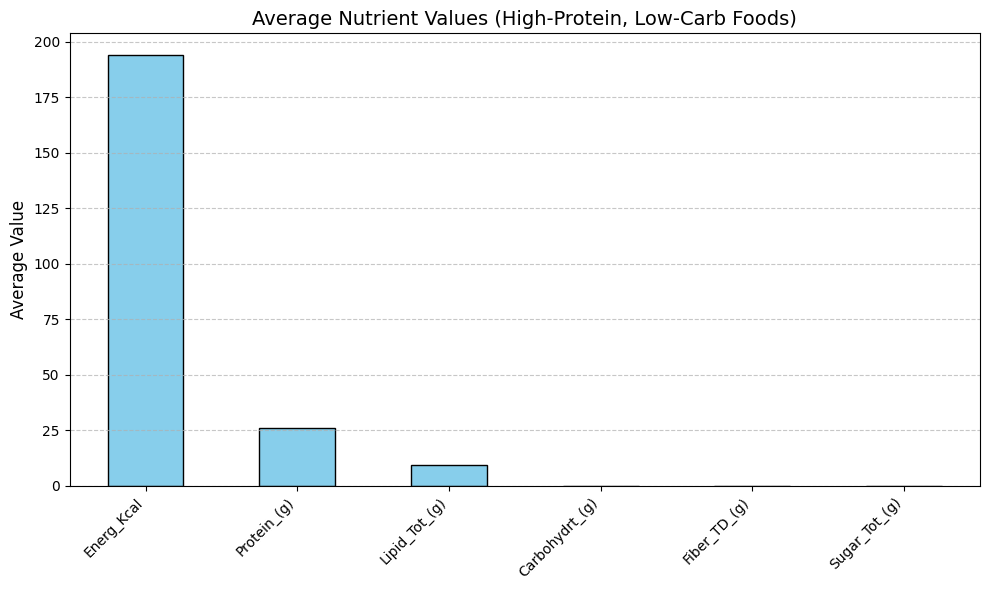

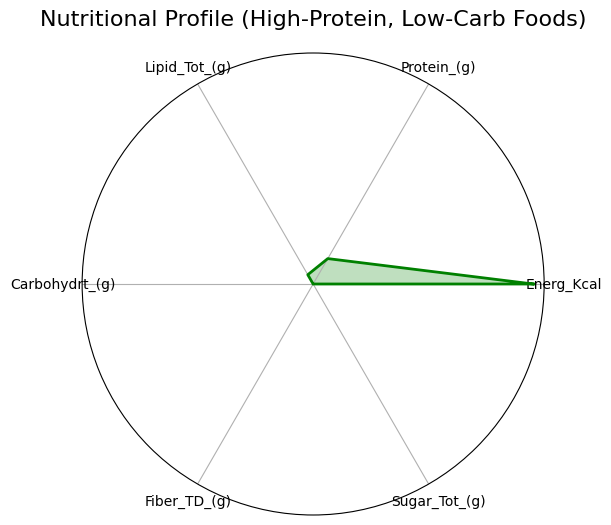

In [47]:
# Bar chart to compare average nutrient values for high-protein, low-carb foods
avg_values = comparison_high_protein_low_carb_adjusted

plt.figure(figsize=(10, 6))
avg_values.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Average Nutrient Values (High-Protein, Low-Carb Foods)", fontsize=14)
plt.ylabel("Average Value", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Radar chart for the nutritional profile of high-protein, low-carb foods
categories = avg_values.index.tolist()
values = avg_values.values.tolist()
plot_radar_chart(categories, values, "Nutritional Profile (High-Protein, Low-Carb Foods)", "green")


In [49]:
# Relax thresholds to include more foods
adjusted_fat_threshold = dataset['Lipid_Tot_(g)'].quantile(0.60)  # Top 40% for fat
adjusted_sugar_threshold = dataset['Sugar_Tot_(g)'].quantile(0.40)  # Bottom 40% for sugar

# Filter foods with relaxed thresholds for high fat and low sugar
high_fat_low_sugar_foods_adjusted = dataset[
    (dataset['Lipid_Tot_(g)'] > adjusted_fat_threshold) &
    (dataset['Sugar_Tot_(g)'] < adjusted_sugar_threshold)
]

# Summary statistics for adjusted high-fat, low-sugar foods
high_fat_low_sugar_summary_adjusted = high_fat_low_sugar_foods_adjusted.describe()

# Compare average nutritional profiles of adjusted high-fat, low-sugar foods
comparison_high_fat_low_sugar_adjusted = high_fat_low_sugar_foods_adjusted[numeric_columns].mean()

# Display the refined subset summary
comparison_high_fat_low_sugar_adjusted.T


,0
Energ_Kcal,305.124348
Protein_(g),19.466612
Lipid_Tot_(g),18.176381
Carbohydrt_(g),3.699628
Fiber_TD_(g),0.318427
Sugar_Tot_(g),0.054698


In [53]:
# Identify unique entries in high-protein, low-carb foods
unique_high_protein_low_carb = high_protein_low_carb_foods_adjusted.sort_values(by='Protein_(g)', ascending=False).head(5)

# Identify unique entries in high-fat, low-sugar foods
unique_high_fat_low_sugar = high_fat_low_sugar_foods_adjusted.sort_values(by='Lipid_Tot_(g)', ascending=False).head(5)

# **PCA dimension reduction**

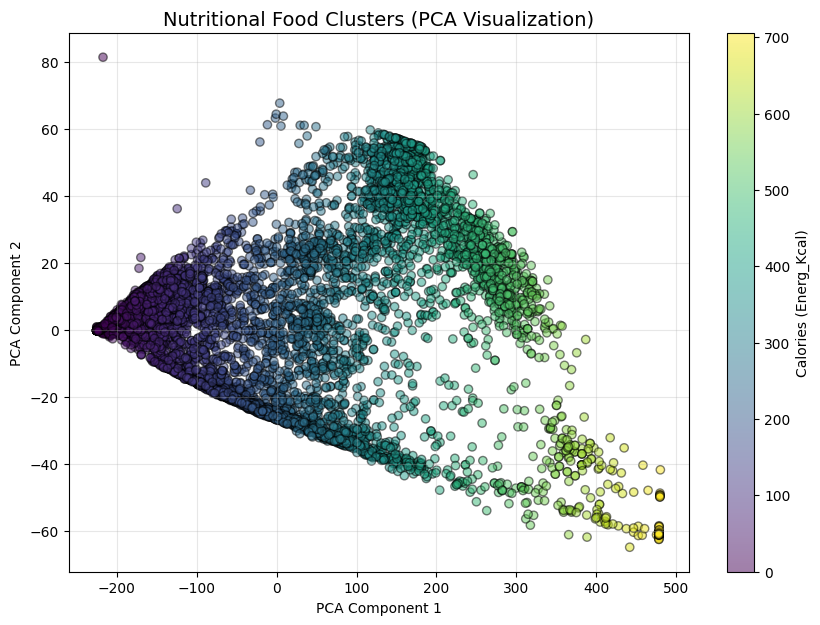

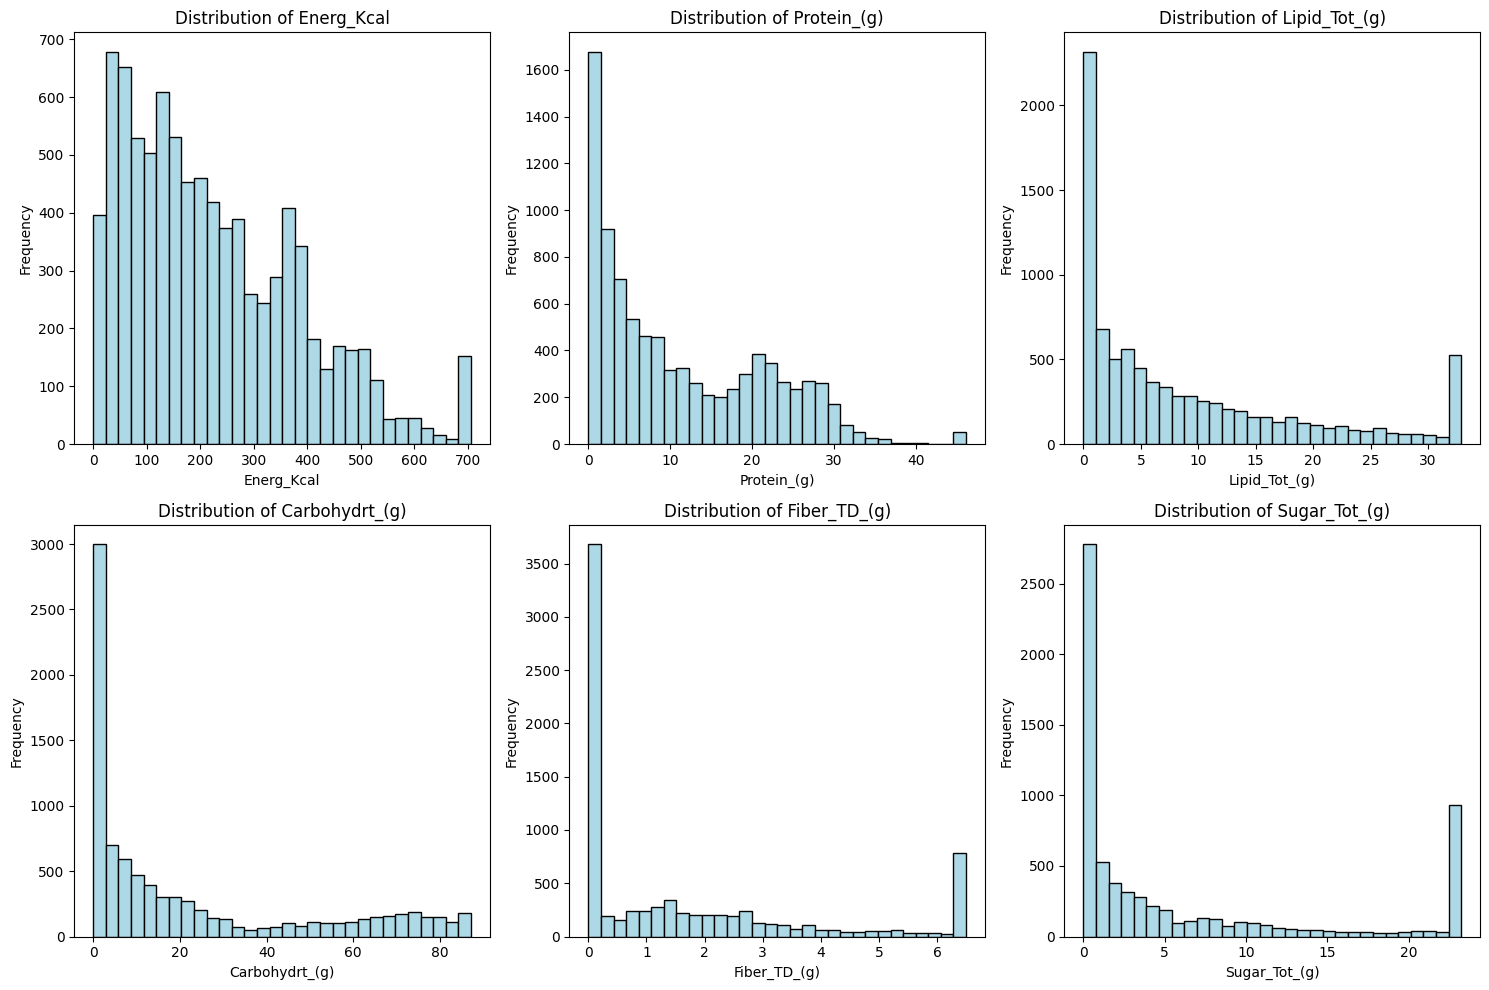

In [54]:
from sklearn.decomposition import PCA

# Select key numeric columns for nutrient visualization
nutrient_data = dataset[numeric_columns].fillna(0)

# PCA to reduce dimensions for visual clustering
pca = PCA(n_components=2)
pca_result = pca.fit_transform(nutrient_data)
dataset['PCA1'] = pca_result[:, 0]
dataset['PCA2'] = pca_result[:, 1]

# Scatter plot of PCA results
plt.figure(figsize=(10, 7))
plt.scatter(dataset['PCA1'], dataset['PCA2'], alpha=0.5, c=dataset['Energ_Kcal'], cmap='viridis', edgecolor='k')
plt.colorbar(label='Calories (Energ_Kcal)')
plt.title('Nutritional Food Clusters (PCA Visualization)', fontsize=14)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(alpha=0.3)
plt.show()

# Histograms of nutrient distributions
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    plt.hist(dataset[column], bins=30, edgecolor='black', color='lightblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
